In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from PIL.ImageOps import crop, flip, mirror
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
RANDOM_STATE = 42

In [3]:
def create_data():
    images = []
    final = []
    label = []
    name = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
    for dis in name:
        folder_path = 'Corn Images/' + dis
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            images.append(img)
            label.append(dis)
    final.append(images)
    final.append(label)
    return final

In [4]:
result = create_data()
dataset = pd.DataFrame({'Images': result[0], 'Label': result[1]})

In [5]:
print(dataset[dataset['Label'] == 'Blight'].count())
print(dataset[dataset['Label'] == 'Common_Rust'].count())
print(dataset[dataset['Label'] == 'Gray_Leaf_Spot'].count())
print(dataset[dataset['Label'] == 'Healthy'].count())

Images    1146
Label     1146
dtype: int64
Images    1306
Label     1306
dtype: int64
Images    574
Label     574
dtype: int64
Images    1162
Label     1162
dtype: int64


In [6]:
display(dataset.head())

Images   Label
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight

In [7]:
def show_image(image):
    image = image.copy()
    plt.imshow(image, aspect='equal')

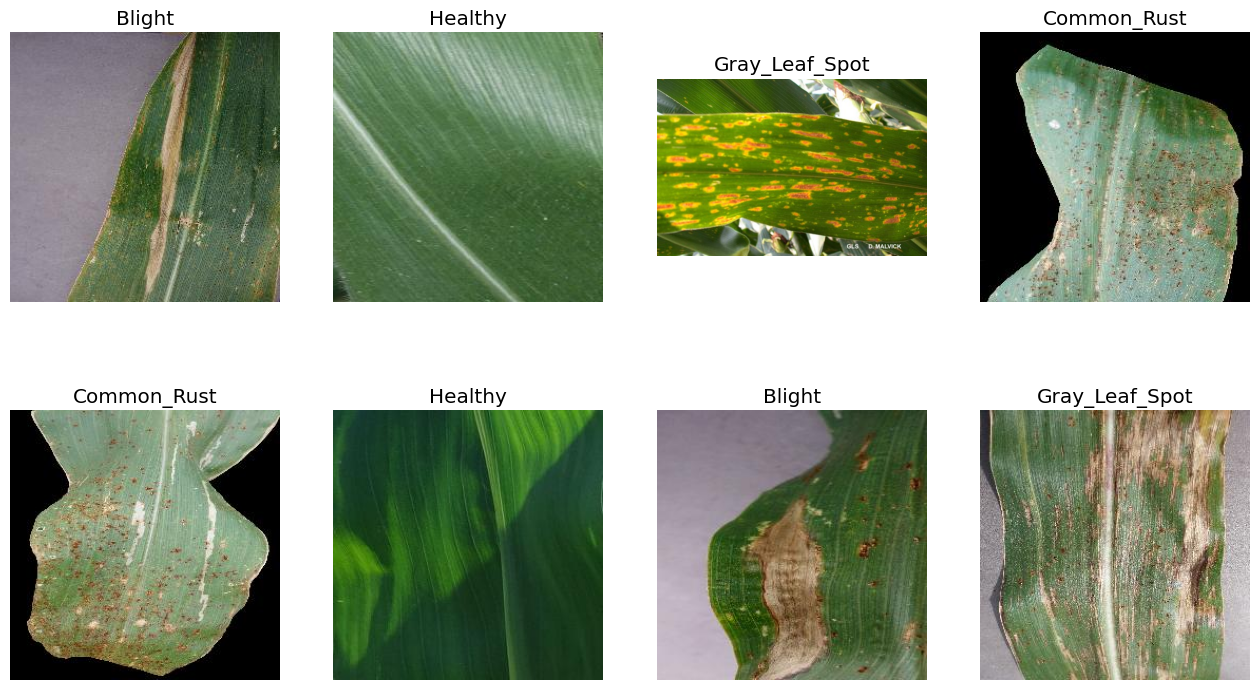

In [9]:
rng = np.random.default_rng(RANDOM_STATE)
n_cols = 4
n_rows = 2
indexes = rng.choice(len(dataset), n_cols * n_rows)

plt.figure(figsize=(16, 9))

for ii, id in enumerate(indexes, 1):
    plt.subplot(n_rows, n_cols, ii)
    image = dataset['Images'][int(id)]
    show_image(image)
    plt.title(dataset['Label'][int(id)])
    plt.axis('off')

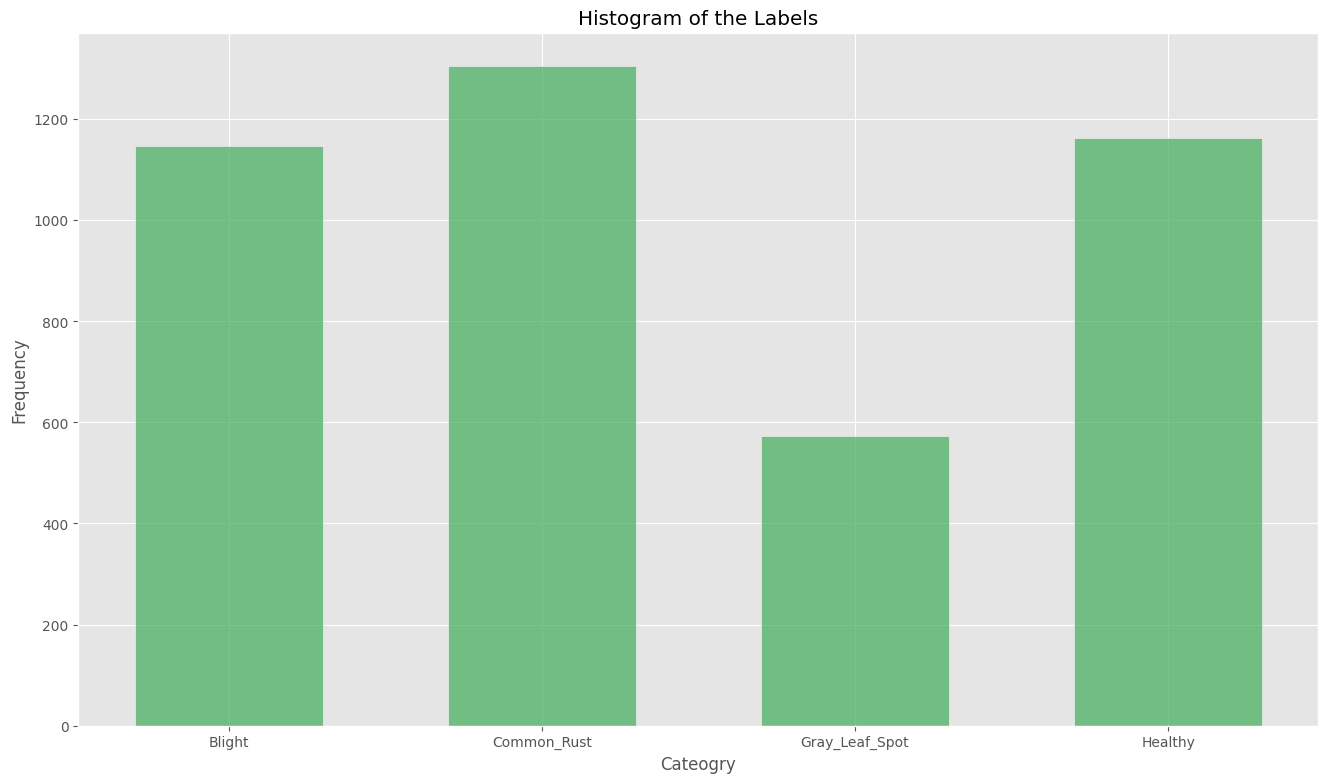

In [10]:
palette = sns.color_palette('Greens', 4)

plt.figure(figsize=(16, 9))
sns.histplot(dataset['Label'], bins=4, shrink=0.6, kde=False, color=palette[2])

plt.xlabel('Cateogry')
plt.ylabel('Frequency')
plt.title('Histogram of the Labels')

# Show the plot
plt.show()

In [21]:
x = dataset[['Images', 'Label']]

In [22]:
display(x.head())

Images   Label
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Blight

In [23]:
for i in range(len(x)):
    im = x["Images"][i]
    if im.mode != "RGB":
        print(im.mode, "Index:", i, end=" --> ")
        x["Images"][i] = x["Images"][i].convert("RGB")
        print("Converted in RGB")

RGBA Index: 1453 --> Converted in RGB
RGBA Index: 1468 --> Converted in RGB
RGBA Index: 1475 --> Converted in RGB
RGBA Index: 2452 --> Converted in RGB
CMYK Index: 2697 --> Converted in RGB


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x['Images'], x['Label'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE,
                                                    shuffle=True,
                                                    stratify=x['Label'])

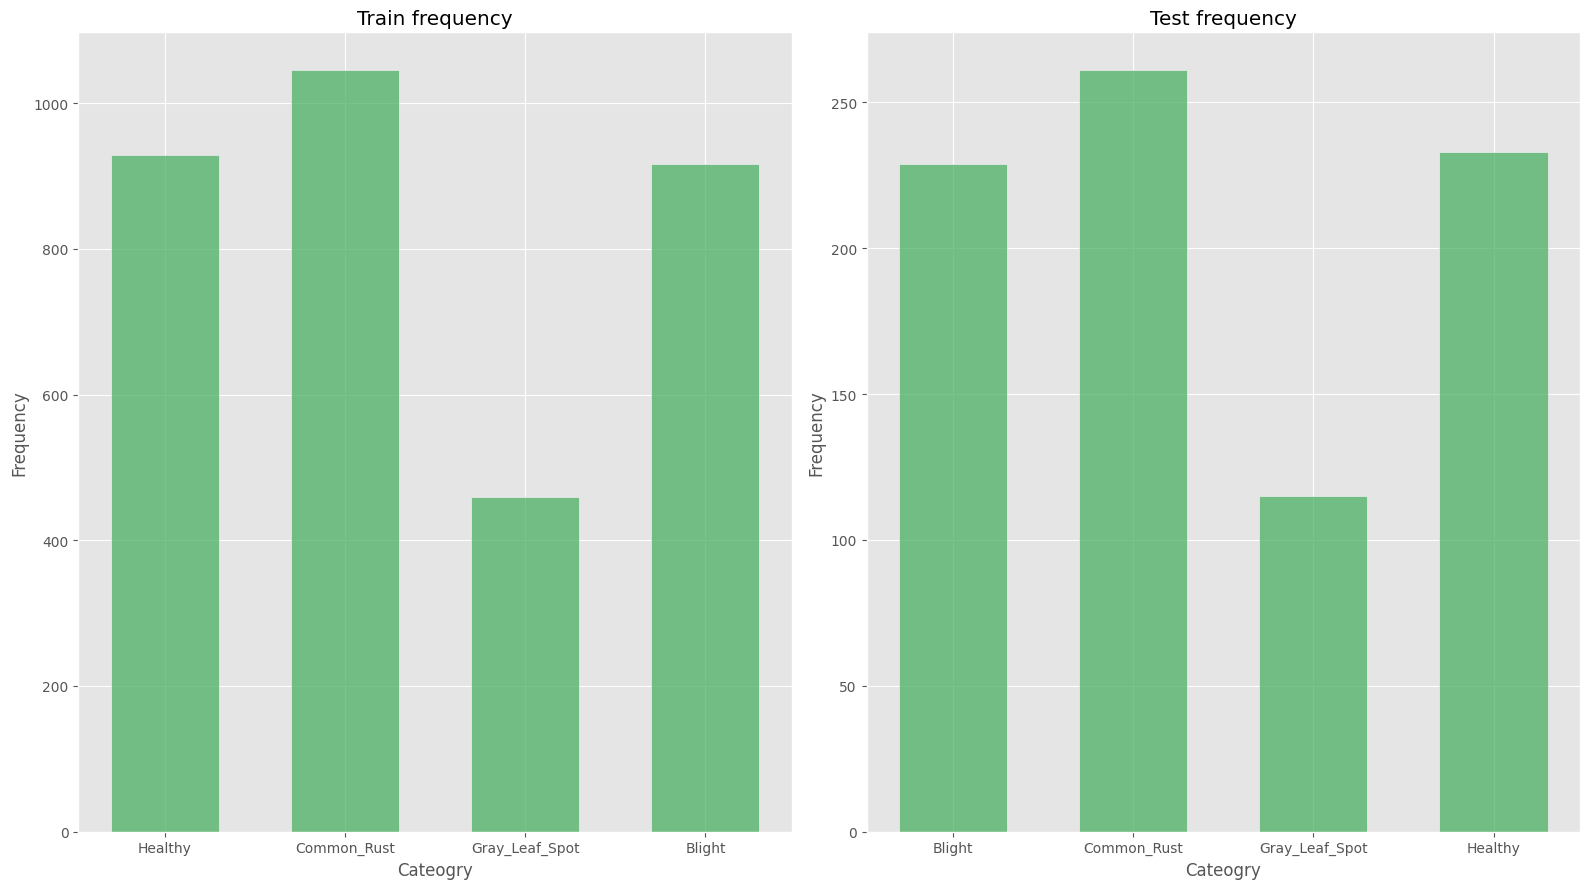

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), tight_layout=True)

sns.histplot(y_train, bins=4, shrink=0.6, kde=False, color=palette[2], ax=ax1)

ax1.set_xlabel('Cateogry')
ax1.set_ylabel('Frequency')
ax1.set_title('Train frequency', size="x-large")

sns.histplot(y_test, bins=4, shrink=0.6, kde=False, color=palette[2], ax=ax2)

ax2.set_xlabel('Cateogry')
ax2.set_ylabel('Frequency')
ax2.set_title('Test frequency', size="x-large")


# Show the plot
plt.show()

In [27]:
def Resize(content):
    return content.resize((224, 224))

In [44]:
np.random.seed(RANDOM_STATE)

In [45]:
def RandomRotation(content):
    p = 0.2
    if np.random.random() < p:
        return content.rotate(np.random.randint(-45, 45))
    else:
        return content

In [46]:
def RandomHorizontalFlip(content):
    p = 0.2
    if np.random.random() < p:
        return mirror(content)
    else:
        return content

In [47]:
def RandomVerticalFlip(content):
    p = 0.2
    if np.random.random() < p:
        return flip(content)
    else:
        return content

In [48]:
def RandomZoom(content):
    p = 0.2
    if np.random.random() < p:
        cropped = crop(content, np.random.randint(0, 50))
        return cropped.resize((224, 224))
    else:
        return content

In [49]:
def AdjustContrast(content):
    p = 0.2
    if np.random.random() < p:
        return ImageEnhance.Contrast(content).enhance(np.random.uniform(0.5, 1.5))
    else:
        return content

In [50]:
def AdjustBrightness(content):
    p = 0.2
    if np.random.random() < p:
        return ImageEnhance.Brightness(content).enhance(np.random.uniform(0.5, 1.5))
    else:
        return content

In [51]:
def DataAugmentation(content):
    content = RandomRotation(content)
    content = RandomHorizontalFlip(content)
    content = RandomVerticalFlip(content)
    content = RandomZoom(content)
    content = AdjustContrast(content)
    content = AdjustBrightness(content)
    return content

In [52]:
X_train = X_train.apply(Resize)
X_test = X_test.apply(Resize)

In [53]:
X_train = X_train.apply(DataAugmentation)

In [54]:
X_train.head()

3531    <PIL.Image.Image image mode=RGB size=224x224 a...
1766    <PIL.Image.Image image mode=RGB size=224x224 a...
1578    <PIL.Image.Image image mode=RGB size=224x224 a...
3323    <PIL.Image.Image image mode=RGB size=224x224 a...
2578    <PIL.Image.Image image mode=RGB size=224x224 a...
Name: Images, dtype: object

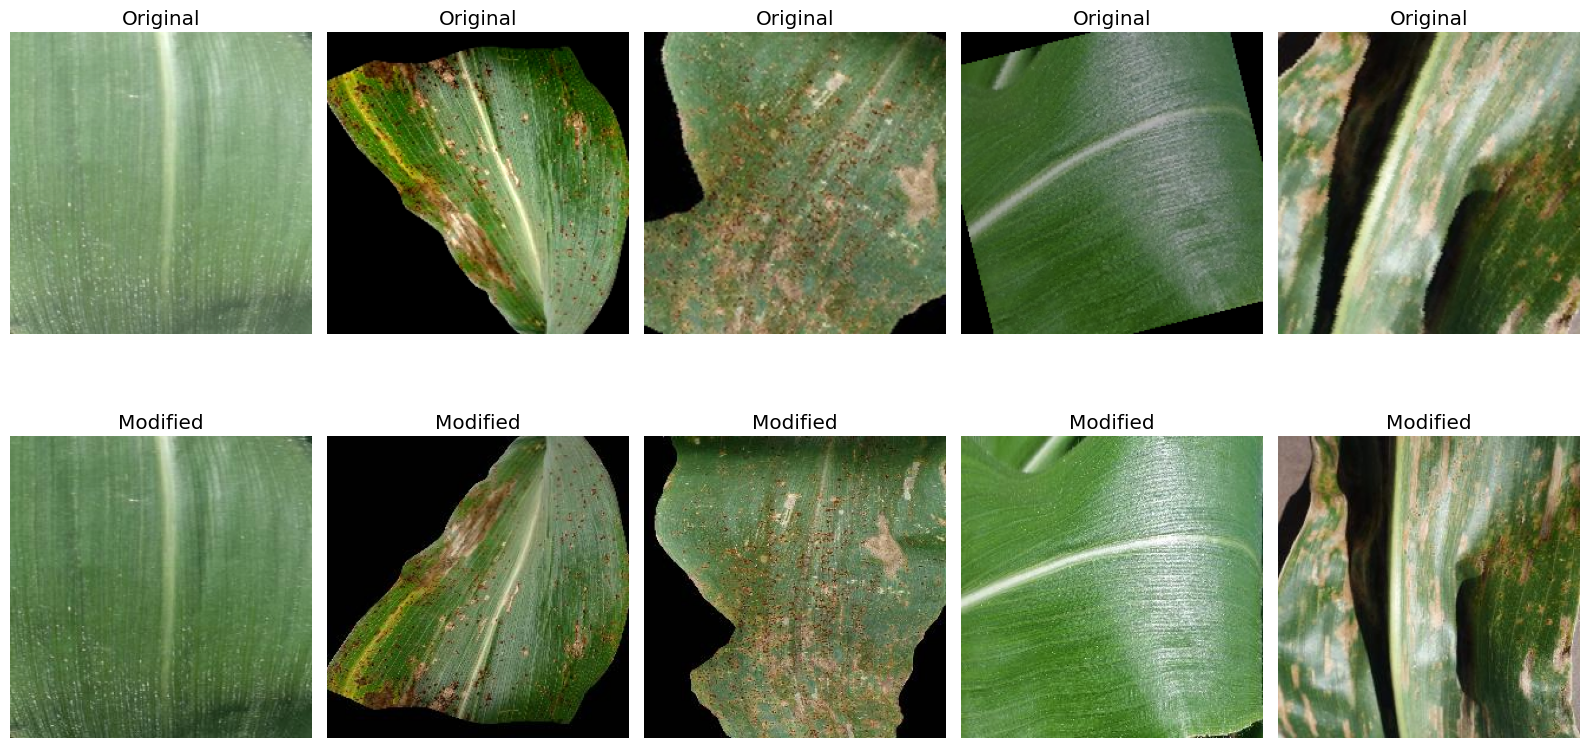

In [55]:
n_rows = 2  
n_cols = 5
index_total = X_train.index
indexes = index_total[:5]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16,9), tight_layout=True)

for i in range(n_cols):
    ax = axes[0, i]
    ax.imshow(X_train[indexes[i]])
    ax.set_title("Original")
    ax.axis("off")
    
    ax = axes[1, i]
    ax.imshow(x["Images"][indexes[i]])
    ax.set_title("Modified")
    ax.axis("off")

plt.show()

In [56]:
def ToNumpy(content):
    return np.asarray(content, dtype=np.float32)

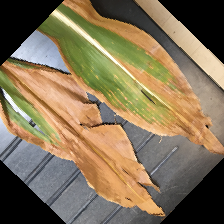

In [57]:
display(X_train[0])

In [58]:
X_train = X_train.apply(ToNumpy)
X_test = X_test.apply(ToNumpy)

In [59]:
def Rescaling(content):
    return content / 255.0

In [60]:
X_train = X_train.apply(Rescaling)
X_test = X_test.apply(Rescaling)

In [61]:
X_train.head()

3531    [[[0.54901963, 0.68235296, 0.5058824], [0.5607...
1766    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
1578    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
3323    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
2578    [[[0.5921569, 0.5058824, 0.45882353], [0.6, 0....
Name: Images, dtype: object

In [62]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values

In [63]:
import pickle
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Input

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [64]:
X_train.shape

(3350,)

In [65]:
XX = X_train

In [66]:
XXX = []
for im in XX:
    XXX.append(im)
XXX = np.array(XXX)

In [97]:
testX = []
for im in X_test:
    testX.append(im)
X_test = np.array(testX)

In [98]:
print(XXX.shape)
print(X_test.shape)

(3350, 224, 224, 3)
(838, 224, 224, 3)


In [68]:
X_train = XXX

In [69]:
enc = OneHotEncoder()

Y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
Y_test = enc.transform(y_test[:, np.newaxis]).toarray()

In [70]:
input_shape = (224, 224, 3)

In [71]:
classifier = Sequential()

classifier.add(Input(shape=input_shape))

classifier.add(Conv2D(16, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=4, activation='softmax', kernel_initializer='random_normal'))


classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [73]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, mode="max")
]

history = classifier.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=callbacks)

Epoch 1/10


105/105 [==============================] - 43s 367ms/step - loss: 0.9822 - accuracy: 0.5687
Epoch 2/10
105/105 [==============================] - 38s 362ms/step - loss: 0.6166 - accuracy: 0.7537
Epoch 3/10
105/105 [==============================] - 38s 358ms/step - loss: 0.5606 - accuracy: 0.7779
Epoch 4/10
105/105 [==============================] - 35s 329ms/step - loss: 0.5301 - accuracy: 0.7842
Epoch 5/10
105/105 [==============================] - 37s 350ms/step - loss: 0.4380 - accuracy: 0.8239
Epoch 6/10
105/105 [==============================] - 39s 372ms/step - loss: 0.3872 - accuracy: 0.8331
Epoch 7/10
105/105 [==============================] - 38s 361ms/step - loss: 0.3607 - accuracy: 0.8460
Epoch 8/10
105/105 [==============================] - 38s 358ms/step - loss: 0.3257 - accuracy: 0.8719
Epoch 9/10
105/105 [==============================] - 38s 363ms/step - loss: 0.3266 - accuracy: 0.8666


In [74]:
classifier.save("corn_disease_classifier.keras")

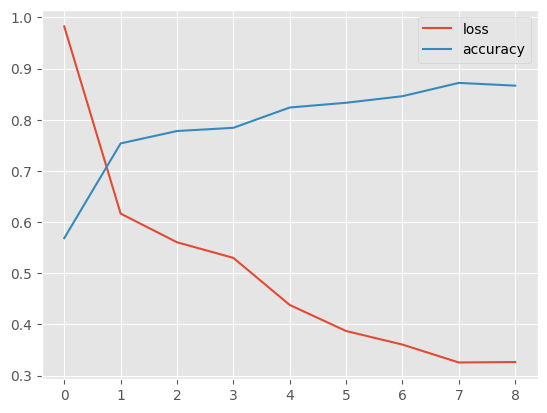

In [75]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show();

In [93]:
def predict_single_image(image) -> str:
    index_label = classifier.predict(np.array([image]), verbose=0).argmax()
    vector = np.zeros(4)
    vector[index_label] = 1
    return enc.inverse_transform([vector])[0][0]

In [84]:
def predict_multiple_images(images):
    vectorized_function = np.vectorize(predict_single_image, otypes=[object])
    return vectorized_function(images)

In [102]:
def from_number_to_label(number):
    vector = np.zeros(4)
    vector[number] = 1
    return enc.inverse_transform([vector])[0][0]

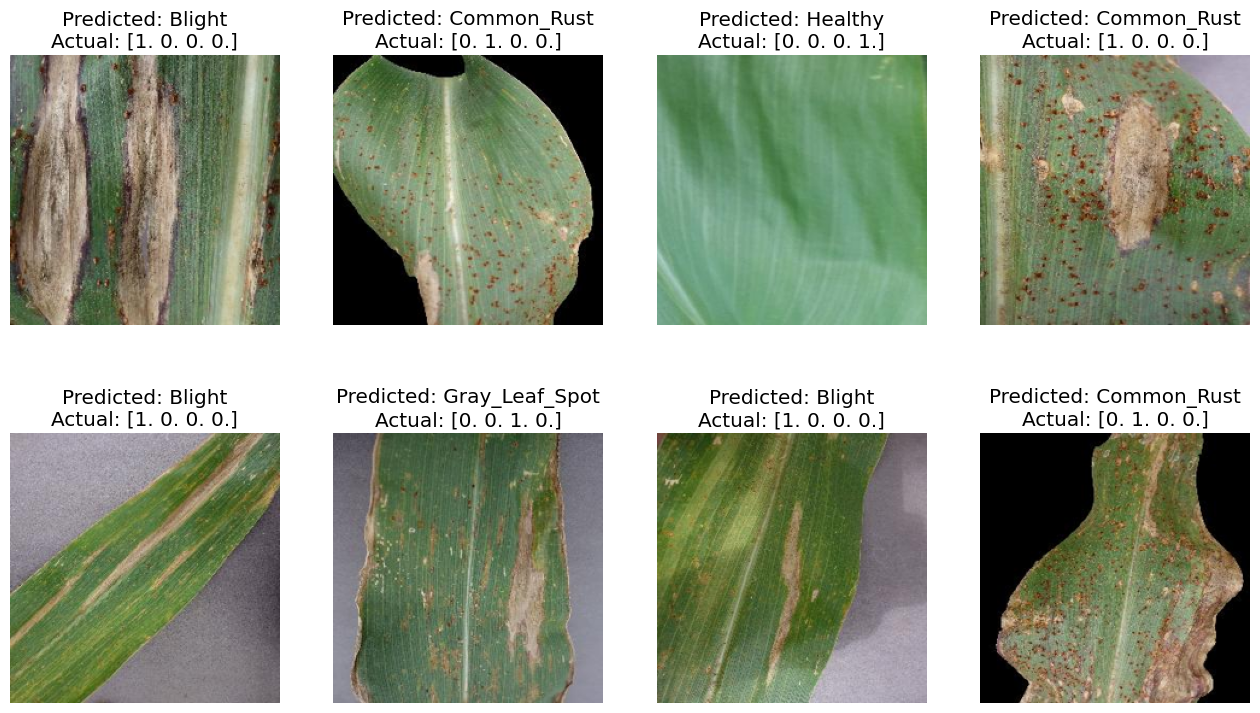

In [96]:
rng = np.random.default_rng(RANDOM_STATE)
n_cols = 4
n_rows = 2
indexes = rng.choice(len(X_test), n_cols * n_rows)

plt.figure(figsize=(16, 9))

for ii, id in enumerate(indexes, 1):
    plt.subplot(n_rows, n_cols, ii)
    image = X_test[int(id)]
    show_image(image)
    title = "Predicted: {}\nActual: {}".format(predict_single_image(image), Y_test[int(id)])
    plt.title(title)
    plt.axis('off')
plt.show()

In [99]:
predictions_test = classifier.predict(X_test)

27/27 [==============================] - 3s 115ms/step


In [103]:
prediction_test = predictions_test.argmax(axis=1)
prediction_labels = []
for n in prediction_test:
    prediction_labels.append(from_number_to_label(n))
print(prediction_labels[:10])

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Common_Rust', 'Healthy', 'Common_Rust', 'Common_Rust', 'Healthy', 'Healthy', 'Common_Rust']


In [105]:
actual_test = Y_test.argmax(axis=1)
actual_test_labels = []
for n in actual_test:
    actual_test_labels.append(from_number_to_label(n))
print(actual_test_labels[:10])

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Common_Rust', 'Healthy', 'Common_Rust', 'Common_Rust', 'Healthy', 'Healthy', 'Common_Rust']


In [106]:
accuracy_score(y_true=Y_test.argmax(axis=1), y_pred=predictions_test.argmax(axis=1))

0.9128878281622912

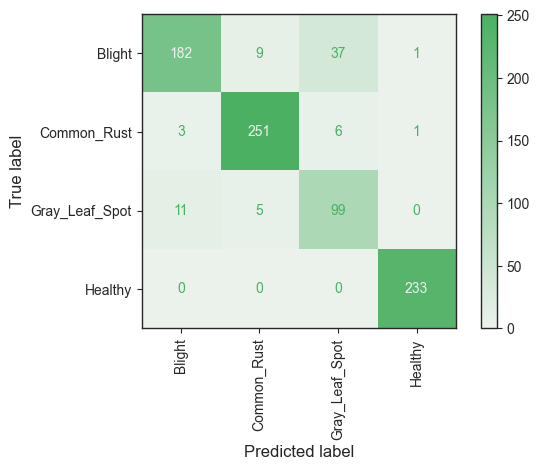

In [115]:
cmap = sns.light_palette(color=sns.color_palette("Greens", 4)[2], as_cmap=True)
sns.set_style("ticks")
ConfusionMatrixDisplay.from_predictions(y_true=actual_test_labels,
                                        y_pred=prediction_labels,
                                        cmap=cmap,
                                        xticks_rotation=90,
                                       )
plt.tight_layout()
plt.show()

In [112]:
classifier.evaluate(X_test, Y_test)

27/27 [==============================] - 4s 114ms/step - loss: 0.2609 - accuracy: 0.9129


[0.2608639597892761, 0.9128878116607666]